# 평가

![image](https://user-images.githubusercontent.com/70187490/127277046-16f05508-5dcd-4b79-9854-c624cac619bb.png)


- 분류의 성능평가 지표
    - 정확도( Accuracy )
    - 오차행렬( Confusion Matrix )
    - 정밀도( Precision )
    - 재현률( Recall )
    - F1 스코어
    - ROC AUC

## 1. 정확도(Accuracy)

- 정확도는 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표
$$Accuracy = \frac{Number \ of \ correct \ prediction}{Total \ number \ of \ prediction}$$

- 가장 직관적인 모델 예측 성능 평가 지표지만, 정확도 수치 하나만 가지고 성능을 평가하지 않음
- 타이타닉과 같은 경우 별다른 알고리즘의 적용없이 무조건 여자면 생존으로 예측해도 높은 정확도가 나올 수 있음
    > 성별 하나만으로 결정하는 단순한 알고리즘도 높은 정확도를 나타내는 상황이 발생

In [1]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit( ) 메서드는 아무것도 학습하지 않음
    def fit(self, X, y=None):
        pass
    # predict( ) 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측함
    def predict(self, X):
        pred = np.zeros( (X.shape[0],1) )
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i]=0
            else:
                pred[i]=1
        
        return pred

- 사이킷런의 BaseEstimator 클래스를 상속받아 아무런 학습을 하지 않고, 성별에 따라 생존자를 예측하는 단순한 Classifier를 생성
    - 사이킷런은 BaseEstimator를 상속받으면 Customized 형태의 Estimator를 개발자가 생성할 수 있음
    
<br>

위의 생성한 MyDummyClassifier 클래스는 
- 학습을 수행하는 fit( ) 메서드는 아무것도 수행하지 않으며
- 예측을 수행하는 predict( ) 메소드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측

In [2]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    from sklearn.preprocessing import LabelEncoder
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는: 0.7877


MNIST 데이터 세트를 변환해 불균현한 데이터 세트로 만든 뒤에 정확도 지표 적용시 문제 발생되는 예시
- 레이블 값이 7인것만이 True, 나머지 값은 모두 False로 변환해 이진 분류로 자료를 변환
> 즉, 전체 데이터의 10%만 True, 나머지 90%는 False인 불균형 데이터 세트로 변형

In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 사이킷런의 내장 데이터 세트인 load_digits( )을 이용해 MNIST 데이터 로딩
digits = load_digits( )

# digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state= 11 )

단순한 알고리즘 제작
- 단순히 predict의 결과를 np.zeros( )로 모두 0값으로 반환하는 클래스 생성
- fit( )단계에서 학습을 하지 않음

In [5]:
class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0 값으로 만들어서 반환
    def predict(self, X):
        return np.zeros( (len(X),1), dtype=bool )

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64


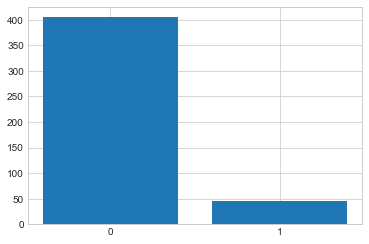

In [6]:
# 불균형한 레이블 데이터 분포도 확인
dist = pd.Series(y_test).value_counts()
print('레이블 테스트 세트 크기:', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(dist)

plt.style.use(['seaborn-whitegrid'])
plt.bar([0,1], dist.values)
plt.xticks([0,1], [0,1]);

In [7]:
# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test, fakepred)))

모든 예측을 0으로 하여도 정확도는:0.900


- 이렇게 불균형한 데이터 세트에서 모든 데이터를 Flase, 즉 0으로 예측하는 classifier를 이용해 정확도를 측정하면 90%에 가까운 예측 정확도를 나타냄
    - 데이터 분포도가 균일하지 않은 경우 높은 수치가 나타날 수 있는 것이 정확도 평가 지표의 맹점
    
> 이러한 정확도가 가지는 분류 평가 지표로서 한계점을 극복하기 위해선 여러가지 분류 지표와 함께 적용해야 함

## 2. 오차행렬
- 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표
- 오차 행렬은 4분면 행렬에서 실제 레이블 클래스 값과 예측 레이블 클래스 값이 어떠한 유형을 가지고 매핑되는 지를 알수 있음

![image](https://user-images.githubusercontent.com/70187490/127271611-443adf08-1e59-405a-8ed8-00a434f13ca9.png)


- TN, FP, FN, TP 기호가 의미하는 것은 
    - 앞 문자 True/False는 예측값과 실제값이 '같은가/틀린가'를 의미
    - 뒤 문자 Negative/Positive는 예측 결과값이 부정(0)/긍정(1)을 의미

<br>

* TN은 예측값으로 Negative 값 0으로 예측했고 실제 값 역시 Negative 값 0
* FP는 예측값으로 Positive 값 1으로 예측했고 실제 값은 Negative 값 0
* FN은 예측값으로 Negative 값 0으로 예측했고 실제 값은 Positive 값 1
* TP는 예측값으로 Positive 값 1으로 예측했고 실제 값도 Positive 값 1

사이킷런은 오차 행렬을 구하기 위해 confusion_matrix( ) API를 제공함  
- 출력된 오차 행렬은 ndarray형태로 출력함
- 즉, TN은 array[0,0]으로 405
- FP는 array[0,1]으로 0
- FN은 array[1,0]으로 45
- TP는 array[1,1]으로 0 에 해당됨

In [8]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, fakepred)
conf_mat

array([[405,   0],
       [ 45,   0]], dtype=int64)

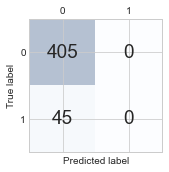

In [9]:

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i, s=conf_mat[i, j], va='center', ha='center', fontsize=19 )
        
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

오차행렬의 값을 조합해 Classifier의 성능을 측정할 수 있는 주요 지표인
* 정확도(Accuracy)
* 정밀도(Precision)
* 재현율(Recall)  
값을 구할 수 있다.

정확도는 예측값과 실제 값이 얼마나 동일한가에 대한 비율만으로 결정됨  
&nbsp;&nbsp;&nbsp;&nbsp;즉, 오차행렬에서 True에 해당하는 TN과 TP에 좌우  

정확도$= \frac{TN + TP}{TN+TP+FP+FN}$

일반적으로 불균형한 레이블 클래스를 가지는 이진 분류 모델에서는 많은 데이터 중에서 중점적으로 찾아야 하는 매우 적은 수의 결괏값에 postive를 설정해 1값을 부여하고, 그렇지 않은 경우는 Negative로 0 값을 부여하는 경우가 많음
> 결과적으로 정확도 지표는 비대칭한 데이터 세트에서 Positive에 대한 예측 정확도를 판단하지 못한 채 Negative에 대한 예측 정확도만으로도 분류의 정확도가 매우 높게 나타나는 수치적인 판단 오류를 일으키게 됌

## 3. 정밀도와 재현율

![image](https://user-images.githubusercontent.com/70187490/127277046-16f05508-5dcd-4b79-9854-c624cac619bb.png)

- Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표  
$$precision= \frac{TP}{FP+TP}$$
$$recall= \frac{TP}{FN+TP}$$
- 정밀도는 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
    - 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표

<br>

- 재현율은 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
    - 민감도라고도 불림

- 재현율이 중요한 경우:  
 **실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우**
        - 실제 Positive인 암환자를 Negative음성으로 잘못 판단할 경우
        - 금융거리 사기인 Positive인 거래를 Negative로 잘못 판단한 경우
- 정밀도가 중요한 경우:  
 **실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우**
        - 실제 Negative인 일반 메일을 Positive인 스팸 메일로 분류할 경우

재현율과 정밀도 모두 TP를 높이는 데 동일하게 초점을 맞추지만
- 재현율은 FN(실제 Positive, 예측 Negative)
- 정밀도는 FP(실제 Negative, 예측 Positive) 를 낮추는데 초점

<br>

사이킷런은 
- 정밀도 계산을 위해 precision_score( )
- 재현율 계산을 위해 recall_score( ) 을 API로 제공

In [10]:
# 평가를 간편하게 적용하기 위해서 confusion matrix, accuracy, precision, recall 등의 평가를 한꺼번에 호출하는 함수

def get_clf_eval(y_test, pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
    import matplotlib.pyplot as plt

    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))
    
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confusion, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confusion.shape[0]):
        for z in range(confusion.shape[1]):
            ax.text(x=z, y=i, s= confusion[i,z], va='center', ha='center', fontsize=19)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


C:\Users\Jun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


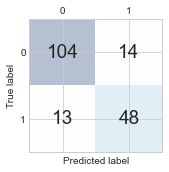

In [11]:
# 로지스틱 회귀 기반으로 타이타닉 생존자 예측 후 평가 지표 출력

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할.
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size=0.2, random_state=11)

lr_clf = LogisticRegression( )

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

### 정밀도/재현율 트레이드 오프
- 분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임곗값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있음
- 하지만 정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에 어느 한쪽을 강제로 높이면 다른 하나의 수치가 떨어지기 쉬움
    - 정밀도/재현율의 트레이드오프(Trade-off)
    
<br>

사이킷런은 개별 데이터별로 예측 확률을 반환하는 메서드인 predict_proba()를 제공
- predict_proba( )메소드는 학습이 완료된 사이킷런 Classifier 객체에서 호출이 가능하며 테스트 피처 데이터를 파라미터로 입력해주면 테스트 피처 레코드의 개별 클래스 예측 확률을 반환함
- predict와 비슷하지만 반환 결과가 예측 결과 확률


In [12]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba() 결과 shape: {}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출: \n', pred_proba[:3])

# 예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 파악
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba() 결과 shape: (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출: 
 [[0.46197701 0.53802299]
 [0.87868649 0.12131351]
 [0.87716331 0.12283669]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46197701 0.53802299 1.        ]
 [0.87868649 0.12131351 0.        ]
 [0.87716331 0.12283669 0.        ]]


threshold 변수를 특정 값으로 설정하고 Binarizer 클래스를 객체로 생성.  
- 생성된 Binarizer 객체의 fit_transform( ) 메서드를 이용해 ndarray를 입력하면  
- 입력된 ndarray의 값을 지정된 threshold보다 같거나 작으면 0값으로, 크면 1값으로 변환해 반환함

In [13]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

# X의 개별 원소들이 threshold 값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))
# 입력된 X 데이터 세트에서 Binarizer의 threshold 값이 1.1보다 같거나 작으면 0, 크면 1로 변환

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


LogisticRegression객체의 predict_proba( ) 메서드로 구한 각 클래스별 예측 확률값인 pred_proba 객체 변수에  
분류 결정 임곗값(threshold)을 0.5로 지정한 Binarizer클래스를 적용해 최종 예측값을 구하는 예제

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


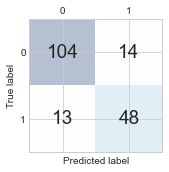

In [14]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값, 분류 결정 임곗값임
custom_threshold =0.5

# predict_proba( ) 반환값의 두 번째 컬럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361


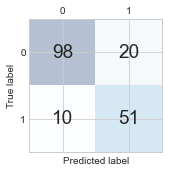

In [15]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉, 결정 임곗값을 0.5에서 0.4로 낮춤
custom_threshold=.4
pred_proba_1 = pred_proba[:,1].reshape(-1, 1)
binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

임곗값을 낮추니 **재현율 값이 올라가고 정밀도가 떨어짐**  
-> 분류 결정 임곗값은 Positive 예측 값을 결정하는 확률의 기준 ( Positive로 예측하는 기준이 낮음 )  

재현률 $= \frac{TP}{TP+FN} = \frac{51}{51+10}$


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
# Thresholds 값에 따른 DataFrame을 만들기 위해 return 값을 추가

def get_clf_eval(y_test, pred):

    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))
    
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confusion, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confusion.shape[0]):
        for z in range(confusion.shape[1]):
            ax.text(x=z, y=i, s= confusion[i,z], va='center', ha='center', fontsize=19)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()
    
    return accuracy, precision, recall

임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361


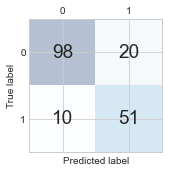

임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033


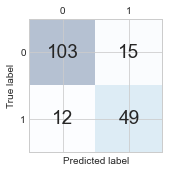

임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


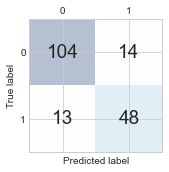

임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541


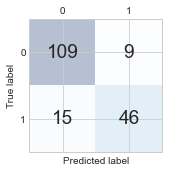

임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377


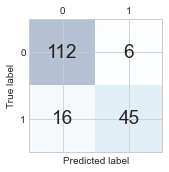

,0.40,0.45,0.50,0.55,0.60
정확도,0.832402,0.849162,0.849162,0.865922,0.877095
정밀도,0.718310,0.765625,0.774194,0.836364,0.882353
재현율,0.836066,0.803279,0.786885,0.754098,0.737705


In [17]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration 하면서 Evaluation을 수행
    table = pd.DataFrame(index=['정확도','정밀도','재현율'])

    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict=binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        
        eval_df = pd.DataFrame(list(get_clf_eval(y_test, custom_predict)), 
                                   index=['정확도','정밀도','재현율'])
        table=pd.concat([table,eval_df], axis=1)
    table.columns = thresholds
    return table
        
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1, 1), thresholds)

사이킷런은 이와 유사한 precision_recall_curve( ) API를 제공함
- 입력파라미터
    - y_true: 실제 클래스값 배열(배열 크기=[데이터 건수])
    - probas_pred: Postive 컬럼의 예측 확률 배열( 배열크기=[데이터 건수] )
- 반환값
    - 정밀도: 임곗값별 정밀도 값을 배열로 반환
    - 재현율: 임곗값별 재현율 값을 배열로 반환

In [18]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

# 반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3) )

반환된 분류 결정 임곗값 배열의 Shape: (143,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값: [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임계값별 정밀도:  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


정밀도와 재현율 곡선을 시각화하기

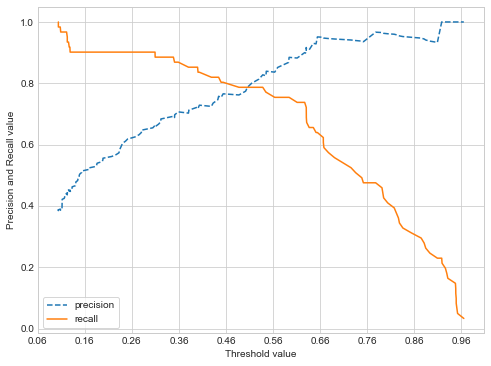

In [19]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
plt.style.use(['seaborn-whitegrid'])

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    # x축을 threshold값으로, y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 x 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(frameon=True); 
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:,1])

임곗값이 낮을수록 많은 수의 양성 예측으로 인해 
- 재현율 값이 극도로 높아지고  
- 정밀도 값이 극도로 낮아짐

### 정밀도와 재현율의 맹점

정밀도 또는 재현율 평가 지표 수치 중 하나를 극단적으로 높이는 방법이지만 숫자 놀음에 불과한 방법   

<br> 

**정밀도가 100%가 되는 방법**  
- 확실한 기준이 되는 경우만 Positive로 예측하고 나머지 모두를 Negative로 예측함
- 정밀도 = TP / (TP + FP)
- 전체 환자 1000명 중 확실한 Positive 환자는 단 한명이라고 하면 
    - 이 한명만 Positive로 예측하고 나머지 모두를 Negative로 예측하더라도 
    - FP는 0, TP는 1이 되므로 정밀도는 1/(1+0)으로 100%가 됨
    
<br> 
    
**재현율이 100%가 되는 방법**
- 모든 환자를 Positive로 예측
- 재현율 = TP /(TP + FN)
- 실제 양성인 사람이 30명 정도라도 TN이 수치에 포함되지 않고 FN은 아예 0이므로 30/(30+0)으로 100%가 됨

## 4. F1 스코어
- imbalance dataset에 적합한 지표
- 정밀도와 재현율을 결합한 지표
- f1 score는 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐  
$$F1= 2 \ \times \frac{precision \times recall}{precision + recall} $$

- 사이킷런은 F1스코어를 구하기 위해 f1_score( )라는 API를 제공

In [20]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
f1 = f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7805


get_clf_eval( )함수에 F1 스코어를 구하는 로직을 추가

임곗값: 0.4


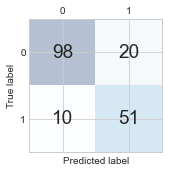

정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361, F1: 0.7727
임곗값: 0.45


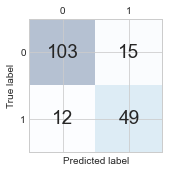

정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033, F1: 0.7840
임곗값: 0.5


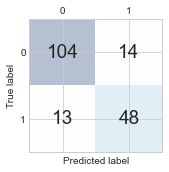

정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, F1: 0.7805
임곗값: 0.55


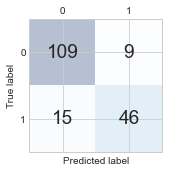

정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541, F1: 0.7931
임곗값: 0.6


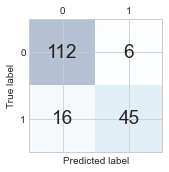

정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377, F1: 0.8036


,0.40,0.45,0.50,0.55,0.60
정확도,0.832402,0.849162,0.849162,0.865922,0.877095
정밀도,0.718310,0.765625,0.774194,0.836364,0.882353
재현율,0.836066,0.803279,0.786885,0.754098,0.737705
f1스코어,0.772727,0.784000,0.780488,0.793103,0.803571


In [21]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confusion, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confusion.shape[0]):
        for z in range(confusion.shape[1]):
            ax.text(x=z, y=i, s= confusion[i,z], va='center', ha='center', fontsize=19)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()
    
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    return accuracy, precision, recall, f1


def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration 하면서 Evaluation을 수행
    table = pd.DataFrame(index=['정확도', '정밀도', '재현율', 'f1스코어'])

    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)

        eval_df = pd.DataFrame(list(get_clf_eval(y_test, custom_predict)),
                               index=['정확도', '정밀도', '재현율', 'f1스코어'])
        table = pd.concat([table, eval_df], axis=1)
    table.columns = thresholds
    return table

thresholds = [0.4, 0.45, 0.50, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

## 5. ROC 곡선과 AUC
![image](https://user-images.githubusercontent.com/70187490/127853473-1930ccea-6fb2-4812-afbc-199c1db3eb2c.png)

- ROC 곡선은 (Receiver Operation Characteristic Curve) 우리말로 수신자 판단 곡선으로 불림
- 머신러닝의 이진분류 모델의 예측성능을 판단하는 중요한 평가 지표
- ROC 곡선은 FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지 나타낸 곡선
- FPR을 X 축으로 TPR을 Y축으로 잡으면 FPR의 변화에 따른 TPR의 변화가 곡선형태로 나타남
- ROC 곡선이 가운데 직선에 가까울수록 성능이 떨어지는 것이며 멀어질수록 성능이 뛰어남
<br>

- TPR은 민감도(재현율)을 나타내며 TP / (FN + TP) 
- 민감도에 대응하는 지표로 TNR(True Negative Rate)라고 불리는 특이성(Specificity)가 있음
    - 민감도(TPR)는 실제값 Positive(양성)가 정확히 예측돼야 하는 수준을 나타냄   
          -> 질병이 있는 사람은 질병이 있는 것으로 양성 판정
    - 특이성(TNR)은 실제값 Negative(음성)가 정확히 예측돼야 하는 수준을 나타냄 
          -> 질병이 없는 건강한 사람은 질병이 없는 것으로 음성 판정
 
TNR = TN / (FP + TN)  
ROC곡선의 X축 기준인 FPR(False Positive Rate)은 FP / (FP+TN)이므로 1-TNR 또는 1- 특이성으로 표현함  
$$FPR = \frac{FP}{(FP+TN)} = 1-TNR$$

사이킷런은 ROC 곡선을 구하기 위해 roc_curve( ) API를 제공.
- roc_curve( )의 주요 입력 파라미터와 반환값
![image](https://user-images.githubusercontent.com/70187490/127969738-0e91379b-8226-4670-a761-efa67f8eea2b.png)

In [22]:
from sklearn.metrics import roc_curve

# 레이블값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 step으로 추출
# thresholds[0]은 max(예측확률) + 1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값:', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR:', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR:', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임곗값: [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임곗값별 FPR: [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임곗값별 TPR: [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


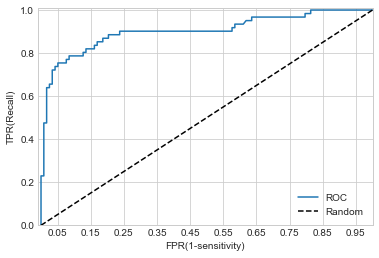

In [23]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 그래프 곡선으로 그림.
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1],'k--', label='Random')
    
    # FPR X축의 Scale을 0.1 단위로 변경, X, Y 축 명 설정등
    start, end = plt.xlim( )
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(-0.01,1); plt.ylim(0,1.01)
    plt.xlabel('FPR(1-sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend( )
    
roc_curve_plot(y_test, pred_proba[:,1])

In [24]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.9024


In [25]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confusion, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confusion.shape[0]):
        for z in range(confusion.shape[1]):
            ax.text(x=z, y=i, s= confusion[i,z], va='center', ha='center', fontsize=19)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()
    
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f},\
    AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

## 피미 인디언 당뇨병 예측

피처 구성
- Pregnancies: 임산 횟수
- Glucose: 포도당 부하 검사 수치
- BloodPressure: 혈압(mm Hg)
- SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
- Insulin: 혈청 인슐링(mu U/ml)
- BMI: 체질량지수(체중(kg)/(키(m))^2)
- DiabetesPedigreeFunction: 당뇨내력 가중치 값
- Age: 나이
- Outcome: 클래스 결정 값(0 또는 1)

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn-notebook'])

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


전체 768개의 데이터 중에서 Negative 값 0이 500개, Positive 값 1이 268개 -> imbalanced data

In [27]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Null 값이 없어 결측치 대체를 할 필요가 없음  
피처의 타입이 모두 숫자형이기에 별도의 피처 인코딩이 필요하지 않음

C:\Users\Jun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


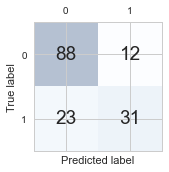

정확도: 0.7727, 정밀도: 0.7209, 재현율: 0.5741, F1: 0.6392,    AUC: 0.7919


In [28]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출
# 맨 끝이 Outcome 컬럼으로 레이블 값이므로 -1을 이용해 추출
X=diabetes_data.iloc[:,:-1]
y=diabetes_data.iloc[:,-1]

# stratify 옵션에 레이블 값으로 지정함으로써 층화추출법으로 추출
# 층화추출 방법이란 트레이닝 데이터 셋과 레이블 데이터 셋에 레이블 별 비율이 똑같이 들어감을 의미
# Imbalanced data에 적용 시 매우 좋은 결과가 나올 수 있음
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test) 
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

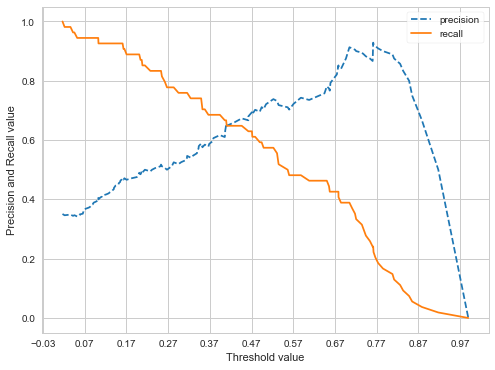

In [29]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

재현율 곡선에서 임곗값을 0.42 정도로 맞추면 최적일 것으로 보임  
하지만 두 지표 모두 0.7이 안되는 수치이기에 좀더 전처리 과정이 필요할 것으로 보임

In [30]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Glucose(포도당), BloodPressure(혈당), SkinThickness(팔 삼두근 근육), Insulin(인슐린), BMI(체지방량)에서  
min 값이 0이라는 말도 안되는 수치가 보임

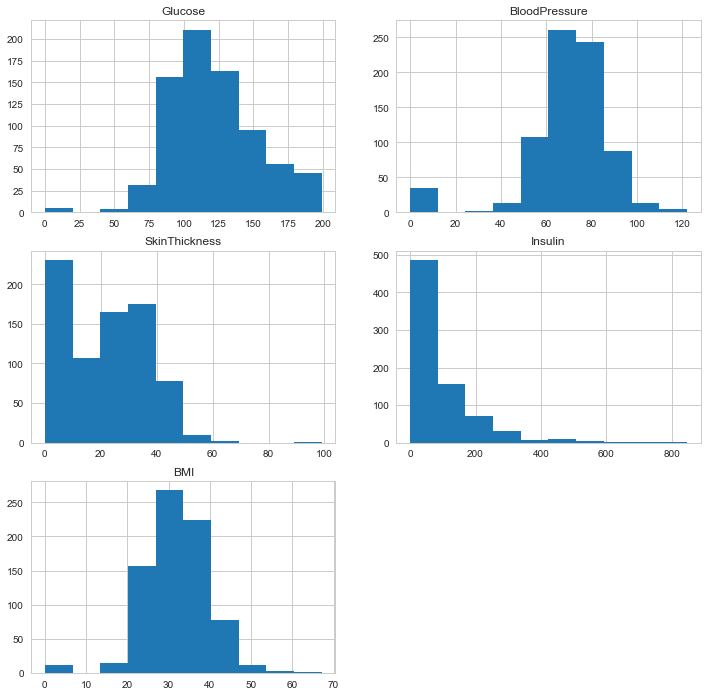

In [31]:
plt.figure(figsize=(12, 12))
for i in range(1, 6):
    plt.subplot(3, 2, i)
    plt.hist(diabetes_data.iloc[:,i], bins=10)
    plt.title(diabetes_data.columns[i]);

In [32]:
# 0값을 검사할 피처명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


SkinThickness, Insulin은 0값이 대단히 많아 0 값들을 평균값으로 대체

In [33]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)

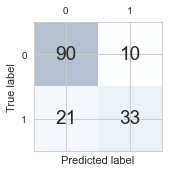

정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804,    AUC: 0.8433


In [34]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:,-1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler  = StandardScaler()
X_scaled= scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, 
                                                    random_state=156, stratify=y)
# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

데이터 변환과 스케일링을 통해 성능수치가 일정 수준 개선된 것을 확인  
분류 결정 임곗값을 변화시키면서 재현율 값의 성능을 개선하기!

In [68]:
def get_clf_eval_for_threshold(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confusion, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confusion.shape[0]):
        for z in range(confusion.shape[1]):
            ax.text(x=z, y=i, s= confusion[i,z], va='center', ha='center', fontsize=19)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()
    
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba[:,1])
    
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f},\
    AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
    return accuracy, precision, recall, f1, roc_auc

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration 하면서 Evaluation을 수행
    table = pd.DataFrame(index=['정확도', '정밀도', '재현율', 'f1스코어', 'ROC AUC'])

    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)

        eval_df = pd.DataFrame(list(get_clf_eval_for_threshold(y_test, custom_predict, pred_proba)),
                               index=['정확도', '정밀도', '재현율', 'f1스코어', 'ROC AUC'])
        table = pd.concat([table, eval_df], axis=1)
    table.columns = thresholds
    return table

임곗값: 0.3


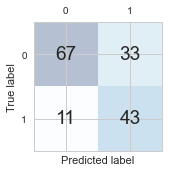

정확도: 0.7143, 정밀도: 0.5658, 재현율: 0.7963, F1: 0.6615,    AUC: 0.8433
임곗값: 0.33


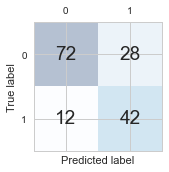

정확도: 0.7403, 정밀도: 0.6000, 재현율: 0.7778, F1: 0.6774,    AUC: 0.8433
임곗값: 0.36


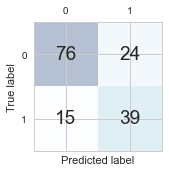

정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222, F1: 0.6667,    AUC: 0.8433
임곗값: 0.39


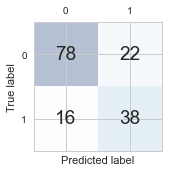

정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037, F1: 0.6667,    AUC: 0.8433
임곗값: 0.42


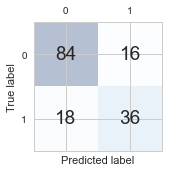

정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667, F1: 0.6792,    AUC: 0.8433
임곗값: 0.45


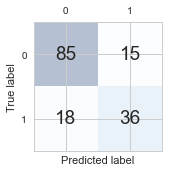

정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667, F1: 0.6857,    AUC: 0.8433
임곗값: 0.48


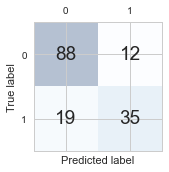

정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931,    AUC: 0.8433
임곗값: 0.5


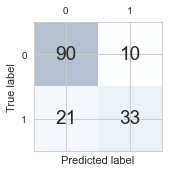

정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804,    AUC: 0.8433


,0.30,0.33,0.36,0.39,0.42,0.45,0.48,0.50
정확도,0.714286,0.740260,0.746753,0.753247,0.779221,0.785714,0.798701,0.798701
정밀도,0.565789,0.600000,0.619048,0.633333,0.692308,0.705882,0.744681,0.767442
재현율,0.796296,0.777778,0.722222,0.703704,0.666667,0.666667,0.648148,0.611111
f1스코어,0.661538,0.677419,0.666667,0.666667,0.679245,0.685714,0.693069,0.680412
ROC AUC,0.843333,0.843333,0.843333,0.843333,0.843333,0.843333,0.843333,0.843333


In [69]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.5]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값을 0.48로 낮춘 상태에서 로지스틱 회귀 모델 학습  
사이킷런의 predict로는 변경할 수 없기에 Binarizer 클래스를 이용하여 조절

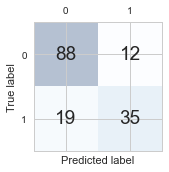

정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931,    AUC: 0.8433


In [71]:
# 임곗값를 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba( ) 예측 확률 array에서 1에 해당하는 컬럼값을 Binarizer 변환
pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1, 1))
get_clf_eval(y_test, pred_th_048, pred_proba[:, 1])